In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from warnings import simplefilter
simplefilter(action='ignore', category=Warning)

## Importing Dataset

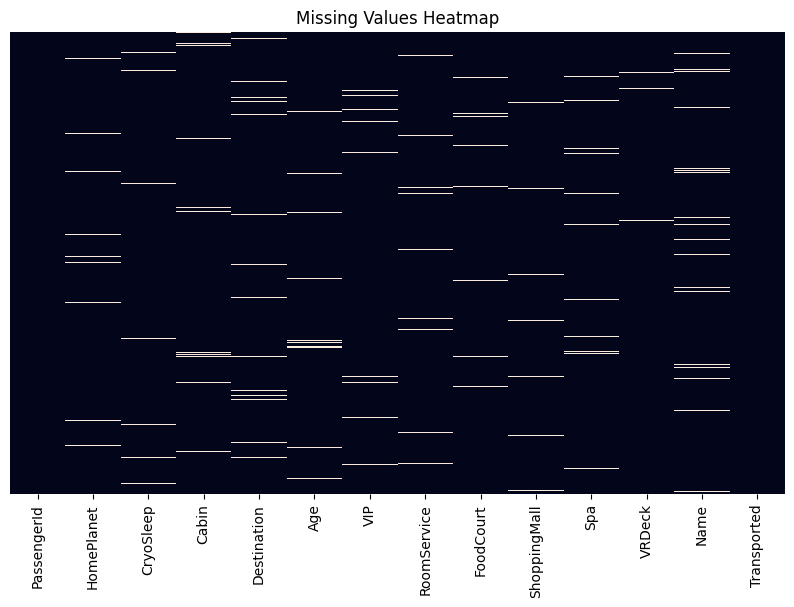

     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa 

In [47]:
training_data_set = pd.read_csv('data/train.csv', header=0)
testing_data_set = pd.read_csv('data/test.csv', header=0)
test_data2 = testing_data_set
plt.figure(figsize=(10, 6))
sns.heatmap(training_data_set.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()
print(training_data_set)
print(testing_data_set)

## Handling Missing data


### For Numeric Data

In [48]:
from sklearn.impute import SimpleImputer
meanimputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
meanimputer.fit(training_data_set.iloc[:, 5:6])
training_data_set.iloc[: , 5:6] = meanimputer.transform(training_data_set.iloc[:, 5:6])
testing_data_set.iloc[: , 5:6] = meanimputer.transform(testing_data_set.iloc[:, 5:6])

meanimputer.fit(training_data_set.iloc[:, 7:12])
training_data_set.iloc[: , 7:12] = meanimputer.transform(training_data_set.iloc[:, 7:12])
testing_data_set.iloc[: , 7:12] = meanimputer.transform(testing_data_set.iloc[:, 7:12])
training_data_set = training_data_set.dropna()
# testing_data_set = testing_data_set.dropna()

### For Categorical Data

In [49]:
columns = ['VIP','CryoSleep','HomePlanet','Destination','Cabin','Name']
for col in columns:
    non_null_values_train = training_data_set[col].dropna()
    non_null_values_test = testing_data_set[col].dropna()

    value_counts = non_null_values_train.value_counts(normalize=True)

    null_indices_train = training_data_set[col].isnull()
    null_indices_test = testing_data_set[col].isnull()

    # training_data_set.loc[null_indices_train, col] = np.random.choice(value_counts.index, size=null_indices_train.sum(), p=value_counts.values)
    testing_data_set.loc[null_indices_test, col] = np.random.choice(value_counts.index, size=null_indices_test.sum(), p=value_counts.values)


## Converting Non-Numeric Data

### Label Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
training_data_set['Transported'] = lbl_enc.fit_transform(training_data_set['Transported'])
training_data_set['CryoSleep'] = lbl_enc.fit_transform(training_data_set['CryoSleep']) 
training_data_set['VIP'] = lbl_enc.fit_transform(training_data_set['VIP']) 

testing_data_set['CryoSleep'] = lbl_enc.fit_transform(testing_data_set['CryoSleep']) 
testing_data_set['VIP'] = lbl_enc.fit_transform(testing_data_set['VIP']) 
print(training_data_set)
# print(X_test.isnull().sum())

     PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age  VIP  \
0        0001_01     Europa          0     B/0/P    TRAPPIST-1e  39.0    0   
1        0002_01      Earth          0     F/0/S    TRAPPIST-1e  24.0    0   
2        0003_01     Europa          0     A/0/S    TRAPPIST-1e  58.0    1   
3        0003_02     Europa          0     A/0/S    TRAPPIST-1e  33.0    0   
4        0004_01      Earth          0     F/1/S    TRAPPIST-1e  16.0    0   
...          ...        ...        ...       ...            ...   ...  ...   
8688     9276_01     Europa          0    A/98/P    55 Cancri e  41.0    1   
8689     9278_01      Earth          1  G/1499/S  PSO J318.5-22  18.0    0   
8690     9279_01      Earth          0  G/1500/S    TRAPPIST-1e  26.0    0   
8691     9280_01     Europa          0   E/608/S    55 Cancri e  32.0    0   
8692     9280_02     Europa          0   E/608/S    TRAPPIST-1e  44.0    0   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck     

### Feature Engineering

In [51]:
training_data_set['Deck'] = training_data_set['Cabin'].apply(lambda x: x.split('/')[0] if isinstance(x, str) and '/' in x else x)
training_data_set['Side'] = training_data_set['Cabin'].apply(lambda x: (x.split('/')[2]=='P') if isinstance(x, str) and '/' in x else x)

# X['Group_No'] = pd.to_numeric(X['PassengerId'].apply(lambda x: x.split('_')[1] if isinstance(x, str) and '_' in x else x))

training_data_set['Firstname'] = training_data_set['Name'].apply(lambda x: x.split(' ')[0] if isinstance(x, str) and ' ' in x else 1)
samename_train = training_data_set['Firstname'].value_counts()
training_data_set['Same_Name'] = training_data_set['Firstname'].apply(lambda x: samename_train[x])

training_data_set['Surname'] = training_data_set['Name'].apply(lambda x: x.split(' ')[1] if isinstance(x, str) and ' ' in x else 1)
family_count_train = training_data_set['Surname'].value_counts()
training_data_set['Family_Size'] = training_data_set['Surname'].apply(lambda x: family_count_train[x])

training_data_set['Group'] = pd.to_numeric(training_data_set['PassengerId'].apply(lambda x: x.split('_')[0] if isinstance(x, str) and '_' in x else x))
group_count_train = training_data_set['Group'].value_counts()
training_data_set['Group_Size'] = training_data_set['Group'].apply(lambda x:group_count_train[x])

training_data_set['Total_Spending'] = training_data_set['RoomService']+training_data_set['FoodCourt']+training_data_set['ShoppingMall']+training_data_set['Spa']+training_data_set['VRDeck']
training_data_set['VR_Spa'] = training_data_set['Spa']+training_data_set['VRDeck']
training_data_set['Room_Food'] = training_data_set['RoomService']+training_data_set['FoodCourt']
training_data_set['VR_Spa_Room_Food'] = training_data_set['RoomService']+training_data_set['FoodCourt']+training_data_set['Spa']+training_data_set['VRDeck']

testing_data_set['Deck'] = testing_data_set['Cabin'].apply(lambda x: x.split('/')[0] if isinstance(x, str) and '/' in x else x)
testing_data_set['Side'] = testing_data_set['Cabin'].apply(lambda x: (x.split('/')[2]=='P') if isinstance(x, str) and '/' in x else x)

# X_test['Group_No'] = pd.to_numeric(X['PassengerId'].apply(lambda x: x.split('_')[1] if isinstance(x, str) and '_' in x else x))

testing_data_set['Firstname'] = testing_data_set['Name'].apply(lambda x: x.split(' ')[0] if isinstance(x, str) and ' ' in x else 1)
samename_test = testing_data_set['Firstname'].value_counts()
testing_data_set['Same_Name'] = testing_data_set['Firstname'].apply(lambda x: samename_test[x])

testing_data_set['Surname'] = testing_data_set['Name'].apply(lambda x: x.split(' ')[1] if isinstance(x, str) and ' ' in x else x)
family_count_test = testing_data_set['Surname'].value_counts()
testing_data_set['Family_Size'] = testing_data_set['Surname'].apply(lambda x: family_count_test[x])

testing_data_set['Group'] = pd.to_numeric(testing_data_set['PassengerId'].apply(lambda x: x.split('_')[0] if isinstance(x, str) and '_' in x else x))
group_count_test = testing_data_set['Group'].value_counts()
testing_data_set['Group_Size'] = testing_data_set['Group'].apply(lambda x:group_count_test[x])

testing_data_set['Total_Spending'] = testing_data_set['RoomService']+testing_data_set['FoodCourt']+testing_data_set['ShoppingMall']+testing_data_set['Spa']+testing_data_set['VRDeck']
testing_data_set['VR_Spa'] = testing_data_set['Spa']+testing_data_set['VRDeck']
testing_data_set['Room_Food'] = testing_data_set['RoomService']+testing_data_set['FoodCourt']
testing_data_set['VR_Spa_Room_Food'] = testing_data_set['RoomService']+testing_data_set['FoodCourt']+testing_data_set['Spa']+testing_data_set['VRDeck']

training_data_set = training_data_set.drop(['Cabin','PassengerId','Name','Firstname','Surname','Group'],axis=1)
testing_data_set = testing_data_set.drop(['Cabin','PassengerId','Name','Firstname','Surname','Group'],axis=1)
training_data_set.head()



,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,Same_Name,Family_Size,Group_Size,Total_Spending,VR_Spa,Room_Food,VR_Spa_Room_Food
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,True,4,1,1,0.0,0.0,0.0,0.0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,False,6,3,1,736.0,593.0,118.0,711.0
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,False,1,6,2,10383.0,6764.0,3619.0,10383.0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,False,3,6,2,5176.0,3522.0,1283.0,4805.0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,False,8,6,1,1091.0,567.0,373.0,940.0


## Feature Scaling

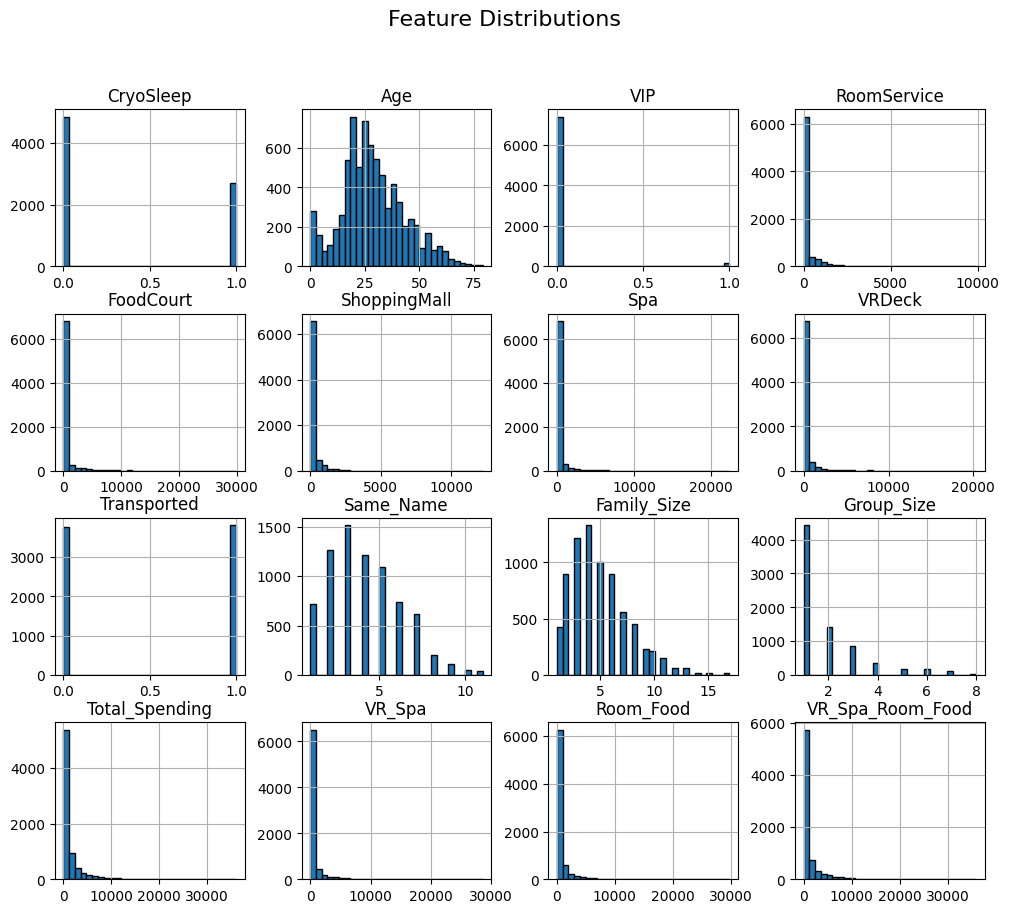

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,Same_Name,Family_Size,Group_Size,Total_Spending,VR_Spa,Room_Food,VR_Spa_Room_Food
0,Europa,0,TRAPPIST-1e,0.711047,0,-0.342541,-0.279637,-0.307478,-0.270247,-0.266941,0,B,True,-0.010914,-1.460284,-0.626948,-0.515511,-0.353004,-0.386454,-0.464605
1,Earth,0,TRAPPIST-1e,-0.335313,0,-0.170167,-0.274108,-0.263001,0.220735,-0.227576,1,F,False,0.953966,-0.719211,-0.626948,-0.252972,-0.004440,-0.318574,-0.204980
2,Europa,0,TRAPPIST-1e,2.036437,1,-0.274540,1.917205,-0.307478,5.735115,-0.223103,0,A,False,-1.458234,0.392399,0.079326,3.188222,3.622857,1.695398,3.326804
3,Europa,0,TRAPPIST-1e,0.292503,0,-0.342541,0.508548,0.352561,2.706946,-0.094272,0,A,False,-0.493354,0.392399,0.079326,1.330826,1.717218,0.351599,1.289967
4,Earth,0,TRAPPIST-1e,-0.893372,0,0.136625,-0.236634,-0.038837,0.235044,-0.265152,1,F,False,1.918846,0.392399,-0.626948,-0.126339,-0.019723,-0.171884,-0.121359


In [52]:
from sklearn.preprocessing import StandardScaler
training_data_set.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()
scalable_features = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Group_Size','Total_Spending','Family_Size','VR_Spa','Room_Food','VR_Spa_Room_Food','Same_Name']
sc = StandardScaler().fit(training_data_set[scalable_features])
training_data_set[scalable_features]=sc.transform(training_data_set[scalable_features])
testing_data_set[scalable_features]=sc.transform(testing_data_set[scalable_features])
training_data_set.head()


### One Hot Encoding

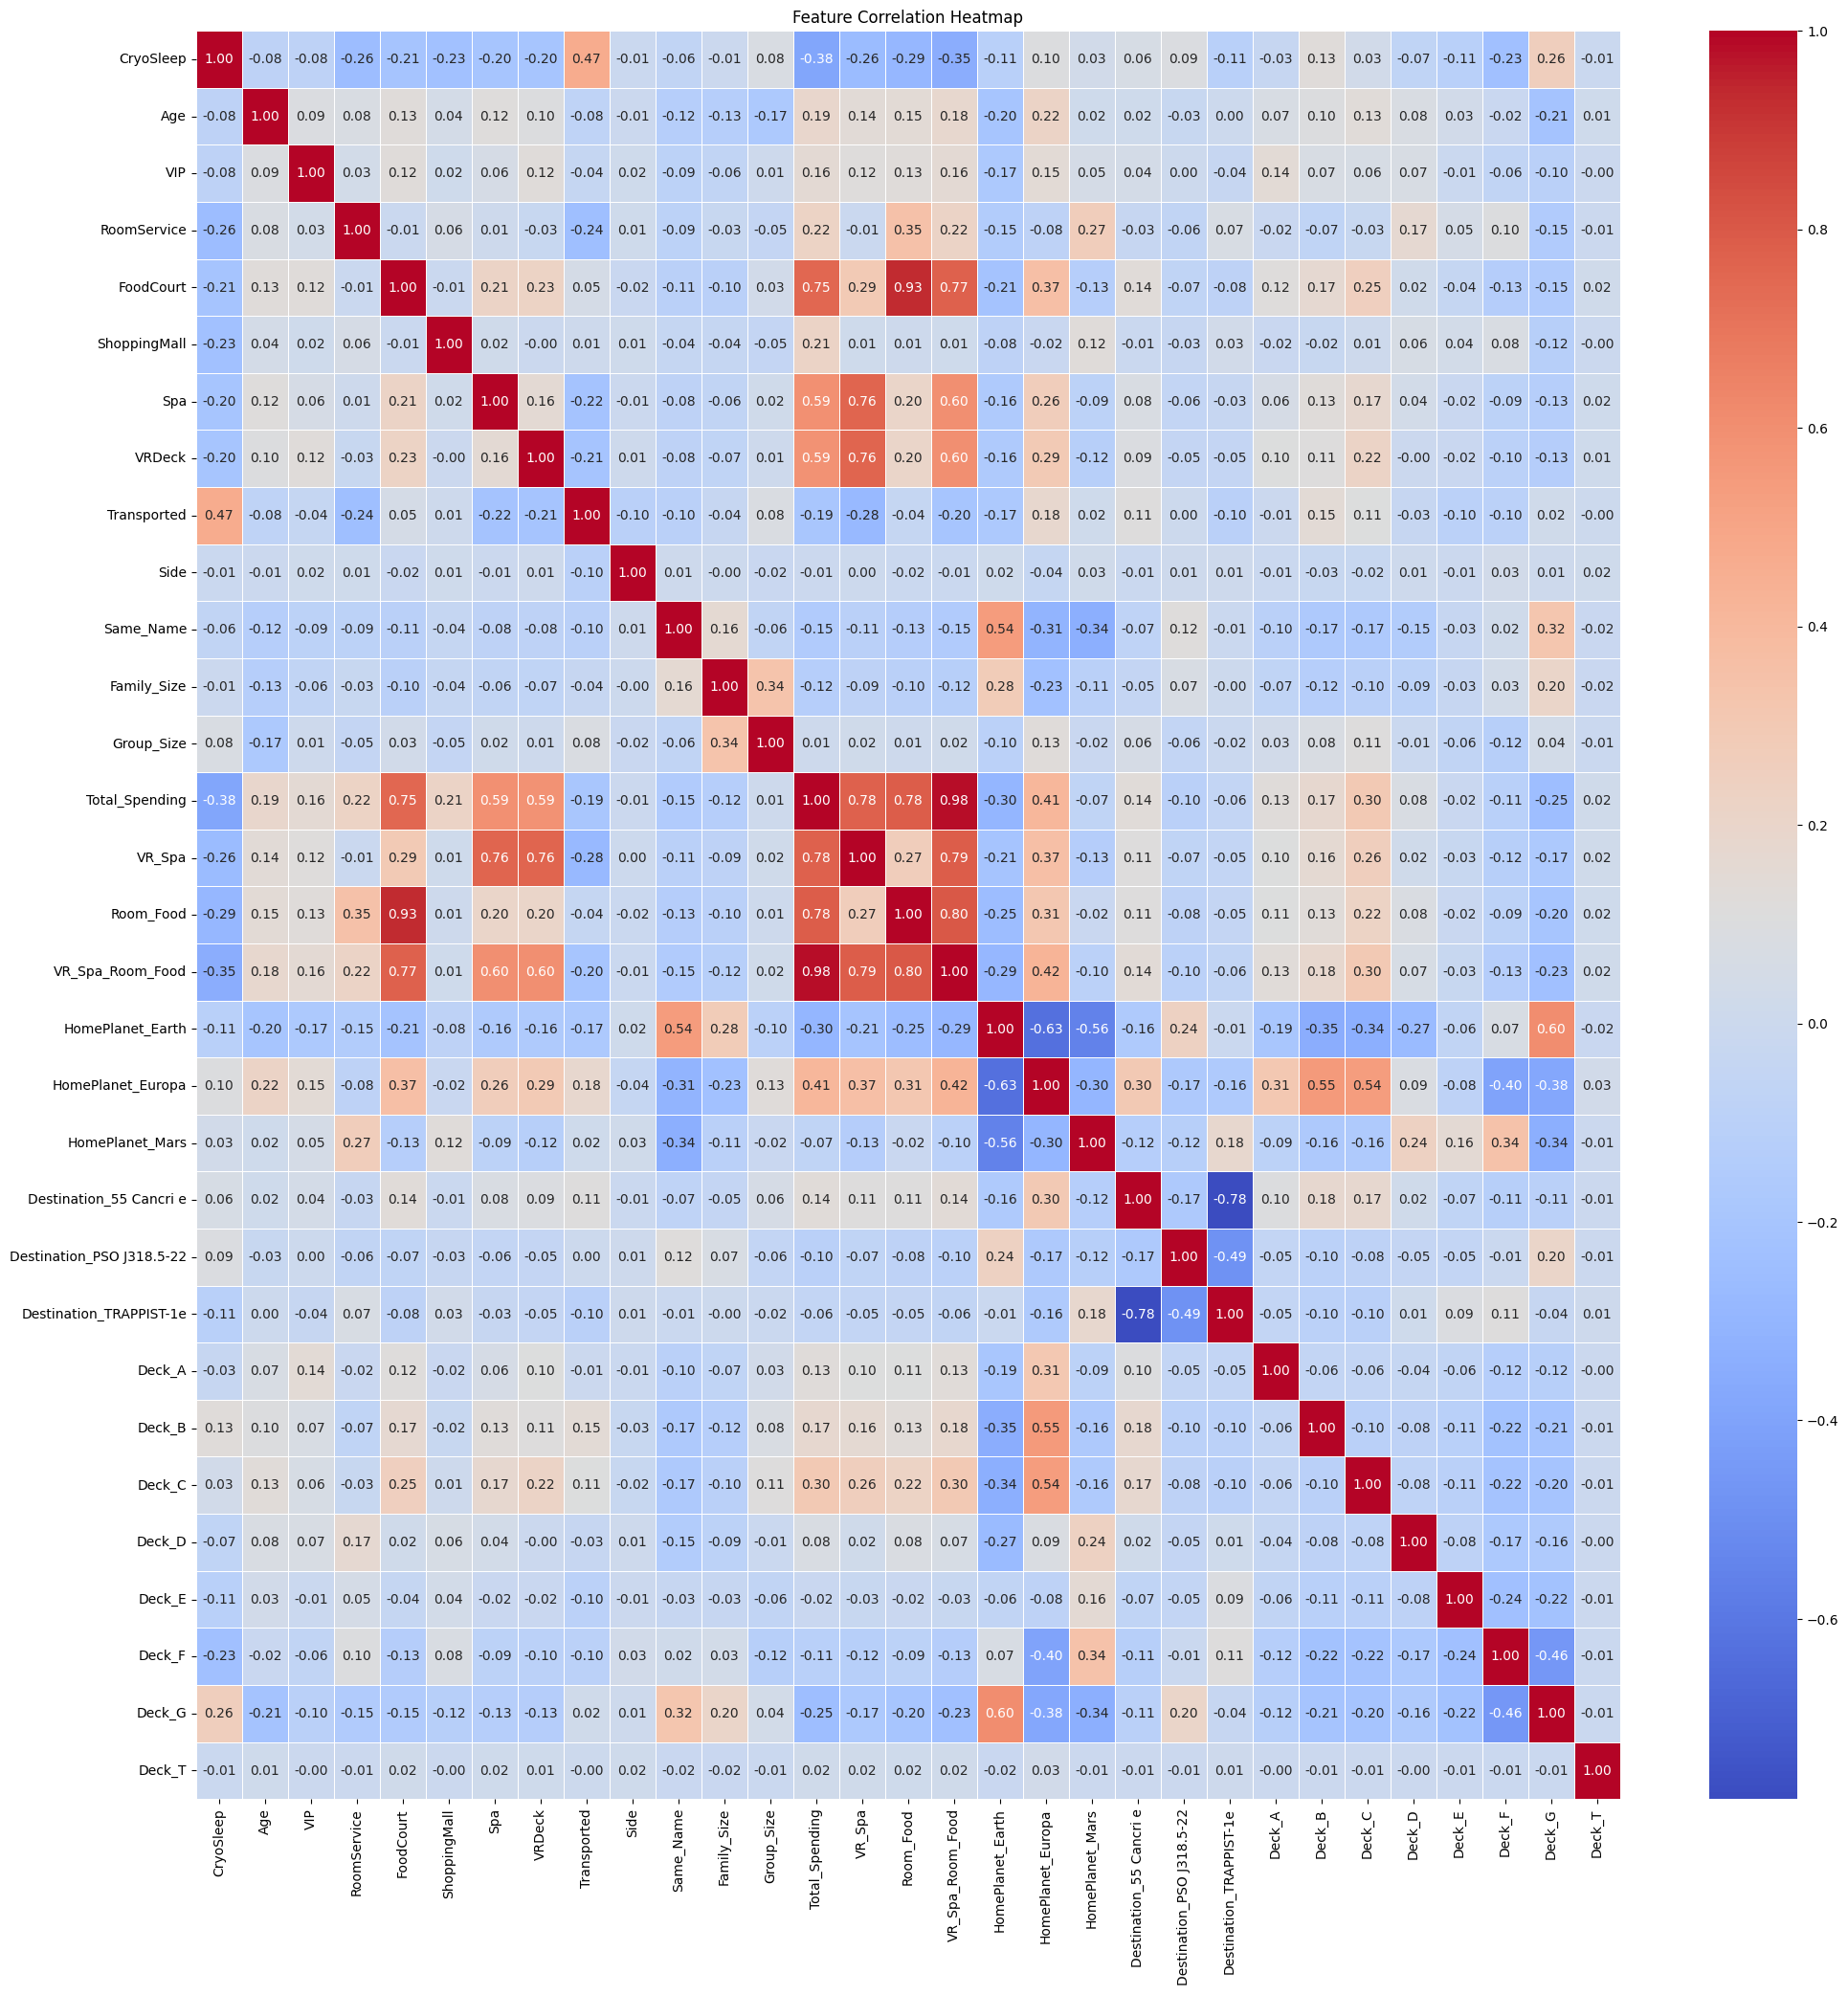

In [53]:
training_data_set = pd.get_dummies(training_data_set, columns=['HomePlanet','Destination','Deck'])*1.0
testing_data_set = pd.get_dummies(testing_data_set, columns=['HomePlanet','Destination','Deck'])*1.0
plt.figure(figsize=(24, 24))
sns.heatmap(training_data_set.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## Splitting Independent Variables from output

In [54]:
training_data_set.columns = training_data_set.columns.str.replace(' ', '_') 
testing_data_set.columns = testing_data_set.columns.str.replace(' ', '_') 
y = training_data_set['Transported']
X = training_data_set.drop('Transported',axis=1)
X_test = testing_data_set

## Splitting data into  Training Set & Validation Set

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train)
print(y_train)

      CryoSleep       Age  VIP  RoomService  FoodCourt  ShoppingMall  \
865         0.0 -0.265556  0.0    -0.342541  -0.279637      0.936100   
6153        0.0 -0.126041  0.0    -0.342541   3.973980      1.202962   
6566        0.0 -0.265556  0.0     0.351697  -0.279637     -0.307478   
4571        0.0  0.432018  0.0    -0.342541   0.417627     -0.307478   
2522        1.0 -1.800218  0.0    -0.342541  -0.279637     -0.307478   
...         ...       ...  ...          ...        ...           ...   
5974        1.0 -1.869975  0.0    -0.342541  -0.279637     -0.307478   
6015        1.0  1.269106  0.0    -0.342541  -0.279637     -0.307478   
6206        0.0 -0.126041  0.0    -0.342541  -0.279637     -0.266559   
1000        1.0 -0.963129  0.0    -0.342541  -0.279637     -0.307478   
8355        1.0 -0.335313  0.0    -0.342541  -0.279637     -0.307478   

           Spa    VRDeck  Side  Same_Name  ...  Destination_PSO_J318.5-22  \
865  -0.231791 -0.247259   0.0   1.436406  ...            

## Cat-Boost Model

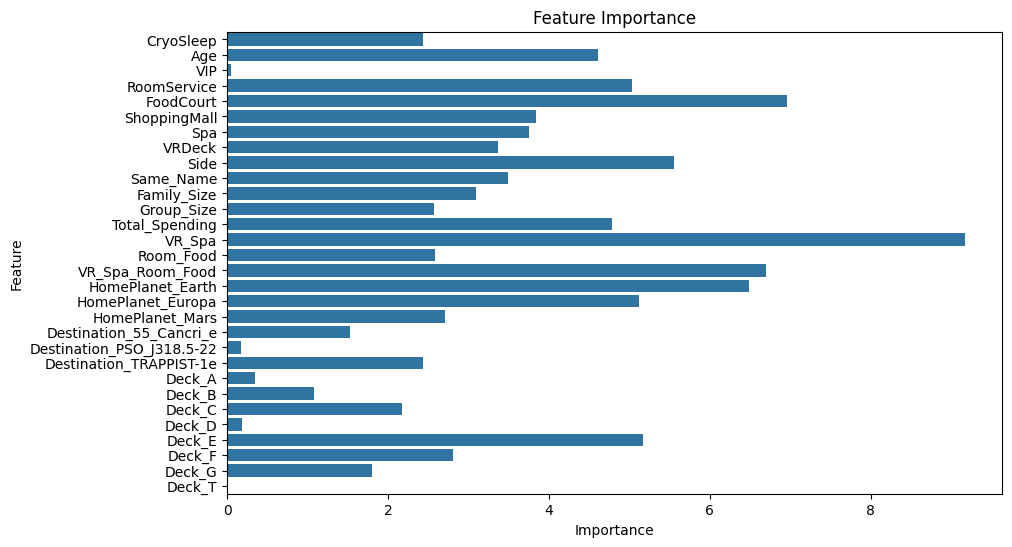

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.80       762
         1.0       0.78      0.83      0.81       750

    accuracy                           0.80      1512
   macro avg       0.80      0.80      0.80      1512
weighted avg       0.80      0.80      0.80      1512



In [56]:
from catboost import CatBoostClassifier,Pool

model = CatBoostClassifier(iterations=500, learning_rate=0.01,depth=10,verbose=0,allow_writing_files=False) 
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
pred = model.predict(X_validation)
print(classification_report(y_validation,pred))

## LightGBM Model

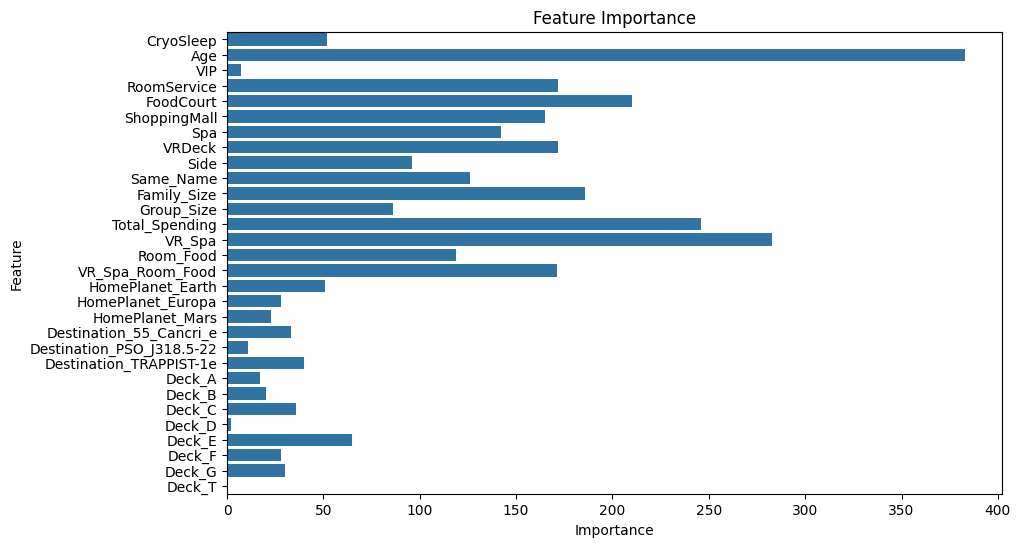

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       762
         1.0       0.80      0.80      0.80       750

    accuracy                           0.80      1512
   macro avg       0.80      0.80      0.80      1512
weighted avg       0.80      0.80      0.80      1512



In [57]:
from lightgbm import LGBMClassifier
model=LGBMClassifier(verbose=0)
model.fit(X_train,y_train)
feature_importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
y_pred=model.predict(X_validation)
print(classification_report(y_validation,y_pred))

## XGBoost

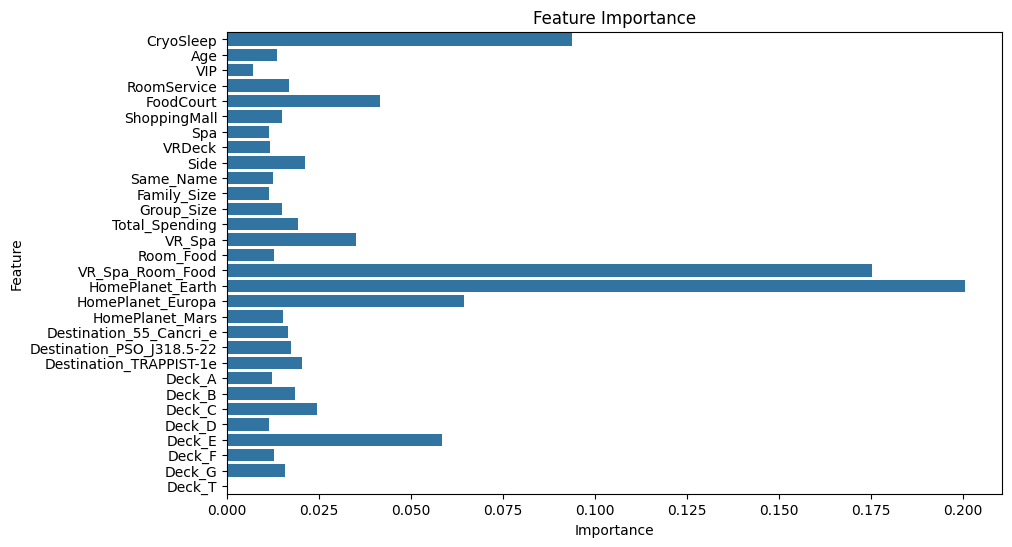

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       762
         1.0       0.80      0.79      0.80       750

    accuracy                           0.80      1512
   macro avg       0.80      0.80      0.80      1512
weighted avg       0.80      0.80      0.80      1512



In [58]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
feature_importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
y_pred=model.predict(X_validation)
print(classification_report(y_validation,y_pred))

## HistGB

In [59]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance
model = HistGradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_validation)
print(classification_report(y_validation,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       762
         1.0       0.79      0.79      0.79       750

    accuracy                           0.79      1512
   macro avg       0.79      0.79      0.79      1512
weighted avg       0.79      0.79      0.79      1512



## MLP

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = [
        {
            'activation' : ['logistic', 'tanh', 'relu','sigmoid'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
        }
       ]

model = RandomizedSearchCV(MLPClassifier(), param_grid, cv=3, scoring='accuracy')
model.fit(X_train,y_train)
y_pred=model.predict(X_validation)
print(classification_report(y_validation,y_pred))
print("Best parameters set found on development set:")
print(model.best_params_)


              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       762
         1.0       0.79      0.82      0.80       750

    accuracy                           0.80      1512
   macro avg       0.80      0.80      0.80      1512
weighted avg       0.80      0.80      0.80      1512

Best parameters set found on development set:
{'solver': 'adam', 'activation': 'relu'}


## ANN

In [61]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score

X_train1 = tf.convert_to_tensor(X_train, dtype=tf.float64)
y_train1 = tf.convert_to_tensor(y_train, dtype=tf.float64)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))

# ann.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))

# ann.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(X_train1, y_train1,validation_data=[X_validation,y_validation],batch_size=32, epochs=60)

X_validation1 = tf.convert_to_tensor(X_validation, dtype=tf.float64)
y_pred = model.predict(X_validation1)
y_pred = (y_pred>0.5)
print(classification_report(y_validation,y_pred))

Epoch 1/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5880 - loss: 0.6663 - val_accuracy: 0.7665 - val_loss: 0.5397
Epoch 2/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7734 - loss: 0.5004 - val_accuracy: 0.7930 - val_loss: 0.4450
Epoch 3/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8004 - loss: 0.4278 - val_accuracy: 0.7956 - val_loss: 0.4298
Epoch 4/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7868 - loss: 0.4325 - val_accuracy: 0.7956 - val_loss: 0.4259
Epoch 5/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8008 - loss: 0.4193 - val_accuracy: 0.7937 - val_loss: 0.4248
Epoch 6/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7968 - loss: 0.4211 - val_accuracy: 0.7923 - val_loss: 0.4209
Epoch 7/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8019 - loss: 0.4146 - val_accuracy: 0.7930 - val_loss: 0.4190
Epoch 8/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8165 - loss: 0.4045 - val_accuracy: 0.

## Voting Model

In [62]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

labels = ['LightGBM','HistGB','Artificial Neural Network','XGBoost','Decision_Tree']
rfc=RandomForestClassifier()
lgb=LGBMClassifier()
hgb=HistGradientBoostingClassifier()
ann = MLPClassifier(hidden_layer_sizes=(16,8),max_iter=52)
cb = CatBoostClassifier()
xgb = XGBClassifier()
dt = DecisionTreeClassifier(criterion='log_loss',max_depth=16)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


# for clf, label in zip([lgb,hgb,ann_model,xgb,dt], labels):
#     scores = model_selection.cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
#     print("Accuracy: ",(scores.mean(), scores.std(), label))

model=VotingClassifier(estimators=[('lgb',lgb),('hgb',hgb),('ann',ann),('cb',cb)],voting='hard',verbose=0)
model.fit(X_train,y_train)
# y_final = model.predict(X_test)
# y_final = pd.DataFrame(y_final)
# y_final = pd.concat([test_data2['PassengerId'],y_final], join = 'outer', axis = 1) 
# y_final.columns = ['PassengerId','Transported']
# y_final['Transported'] = (y_final['Transported']==1)
# y_final.to_csv('submission.csv',index=False)
pred=model.predict(X_validation)
print(classification_report(y_validation, pred))



Learning rate set to 0.022215
0:	learn: 0.6821010	total: 10.8ms	remaining: 10.8s
1:	learn: 0.6722989	total: 21.7ms	remaining: 10.8s
2:	learn: 0.6632115	total: 32.7ms	remaining: 10.9s
3:	learn: 0.6536610	total: 43.3ms	remaining: 10.8s
4:	learn: 0.6436141	total: 51.2ms	remaining: 10.2s
5:	learn: 0.6349043	total: 58.6ms	remaining: 9.71s
6:	learn: 0.6257902	total: 64.7ms	remaining: 9.18s
7:	learn: 0.6177690	total: 69.9ms	remaining: 8.67s
8:	learn: 0.6104306	total: 74.5ms	remaining: 8.2s
9:	learn: 0.6034887	total: 78.6ms	remaining: 7.78s
10:	learn: 0.5966062	total: 82.4ms	remaining: 7.4s
11:	learn: 0.5896347	total: 86.2ms	remaining: 7.1s
12:	learn: 0.5828386	total: 90.1ms	remaining: 6.84s
13:	learn: 0.5770378	total: 93.9ms	remaining: 6.61s
14:	learn: 0.5705108	total: 97.7ms	remaining: 6.42s
15:	learn: 0.5639469	total: 102ms	remaining: 6.27s
16:	learn: 0.5587271	total: 106ms	remaining: 6.12s
17:	learn: 0.5542781	total: 110ms	remaining: 5.99s
18:	learn: 0.5500192	total: 114ms	remaining: 5.88s